In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [5]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


<BarContainer object of 2 artists>

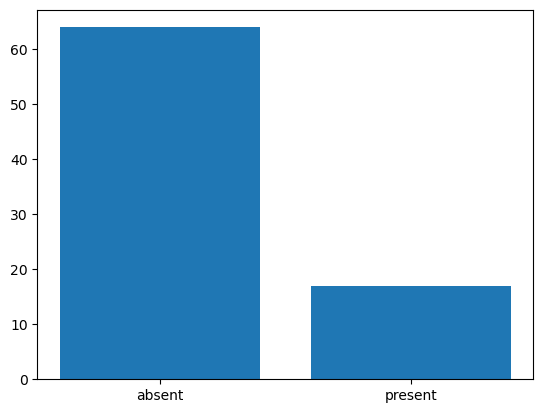

In [6]:
import matplotlib.pyplot as plt
dist_1=df.groupby('Kyphosis')['Kyphosis'].value_counts()
plt.bar(dist_1.index, dist_1.values)

In [7]:
import sys
x=df.drop('Kyphosis',axis=1)
y=df['Kyphosis']
x_np=x.to_numpy()
y_np=y.to_numpy()
print(sys.getsizeof(x))
print(sys.getsizeof(x_np))
print(sys.getsizeof(y))
print(sys.getsizeof(y_np))

2108
128
5284
112


In [8]:
y_np=np.where(y_np=='present',1,0)

In [9]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te=train_test_split(x_np,y_np,test_size=0.25,random_state=1,stratify=y)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
model_LR=LogisticRegression()
model_LR.fit(x_tr,y_tr)
y_pred=model_LR.predict(x_te)
print(accuracy_score(y_te,y_pred))

0.7619047619047619


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
sc=StandardScaler()
mm=MinMaxScaler()
x_tr_mm=mm.fit_transform(x_tr)
x_te_mm=mm.transform(x_te)

In [12]:
print(accuracy_score(model_LR.predict(x_te_mm),y_te))
print(classification_report(model_LR.predict(x_te_mm),y_te))

0.8095238095238095
              precision    recall  f1-score   support

           0       1.00      0.81      0.89        21
           1       0.00      0.00      0.00         0

    accuracy                           0.81        21
   macro avg       0.50      0.40      0.45        21
weighted avg       1.00      0.81      0.89        21



C:\Users\navee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\navee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\navee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
print(model_LR.coef_)

[[ 0.00667997  0.52325844 -0.21627516]]


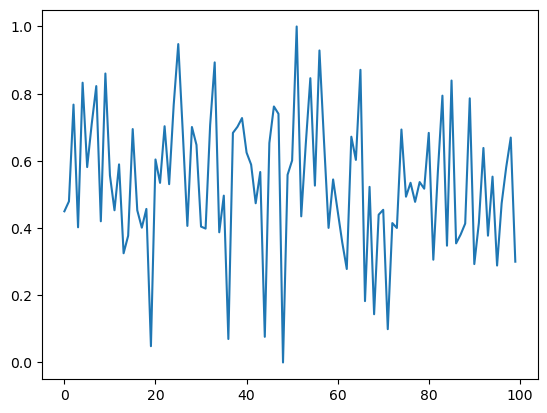

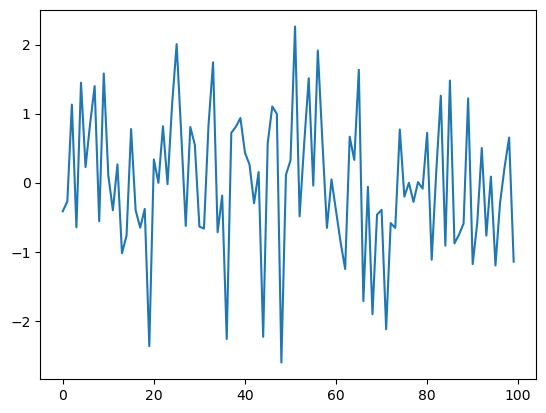

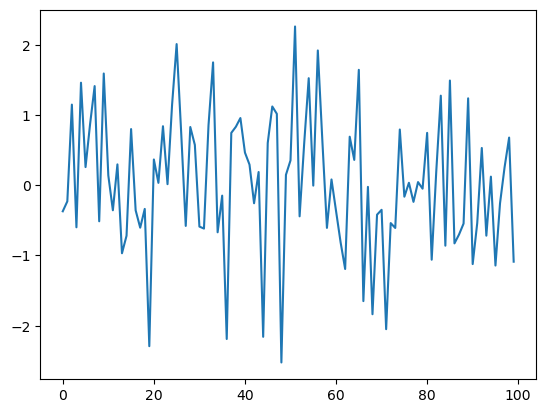

In [14]:
arr=np.random.randn(100,1)
mm_scaler=MinMaxScaler()
sc_scaler=StandardScaler()
mm_arr=mm_scaler.fit_transform(arr)
sc_arr=sc_scaler.fit_transform(arr)
plt.plot(mm_arr)
plt.show()
plt.plot(sc_arr)
plt.show()
plt.plot(arr)
plt.show()

In [15]:
from sklearn.naive_bayes import GaussianNB
model_NB=GaussianNB()
model_NB.fit(x_tr_mm,y_tr)
y_pred=model_NB.predict(x_te_mm)
print(accuracy_score(y_te,y_pred))

0.7619047619047619


In [16]:
from sklearn.svm import SVC
model_svm=SVC(kernel='rbf',gamma=0.2)
model_svm.fit(x_tr_mm,y_tr)
y_pred=model_svm.predict(x_te_mm) 
print(accuracy_score(y_te,y_pred))

0.8095238095238095


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model_dt=DecisionTreeClassifier(max_depth=4,criterion='gini')
model_dt.fit(x_tr_mm,y_tr)
y_pred=model_dt.predict(x_te_mm)
print(accuracy_score(y_te,y_pred))

0.7619047619047619


[Text(0.6, 0.9, 'x[2] <= 0.469\ngini = 0.339\nsamples = 60\nvalue = [47, 13]'),
 Text(0.4, 0.7, 'x[2] <= 0.188\ngini = 0.444\nsamples = 15\nvalue = [5, 10]'),
 Text(0.3, 0.5, 'x[0] <= 0.632\ngini = 0.494\nsamples = 9\nvalue = [5, 4]'),
 Text(0.2, 0.3, 'x[0] <= 0.488\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.1, 0.1, 'gini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.3, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.8, 0.7, 'x[2] <= 0.781\ngini = 0.124\nsamples = 45\nvalue = [42, 3]'),
 Text(0.7, 0.5, 'x[0] <= 0.227\ngini = 0.245\nsamples = 21\nvalue = [18, 3]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.8, 0.3, 'x[0] <= 0.466\ngini = 0.375\nsamples = 12\nvalue = [9, 3]'),
 Text(0.7, 0.1, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.9, 0.1, 'gini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.9, 0.5, 'gini = 0.0

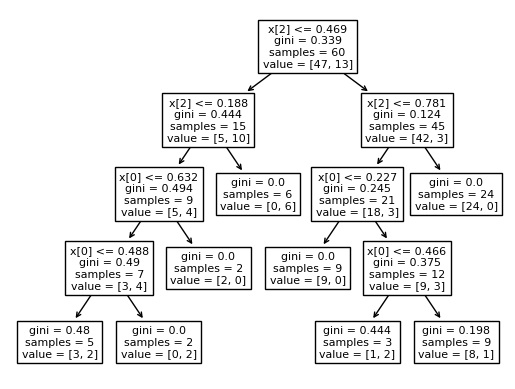

In [18]:
tree.plot_tree(model_dt)

In [19]:
from sklearn.ensemble import RandomForestClassifier
model_RF=RandomForestClassifier(max_depth=5,n_estimators=10)
model_RF.fit(x_tr_mm,y_tr)
y_pred=model_RF.predict(x_te_mm)
print(accuracy_score(y_te,y_pred))

0.7619047619047619


In [20]:
from sklearn.model_selection import GridSearchCV
rf_params=[{'max_depth':list(range(2,12)),'n_estimators':[10,50,100,150,200]}]
model_cv=GridSearchCV(model_RF,rf_params,cv=10,scoring='accuracy')
model_cv.fit(x_tr_mm,y_tr)
y_pred=model_cv.predict(x_te_mm)
accuracy_score(y_te,y_pred)

0.7619047619047619

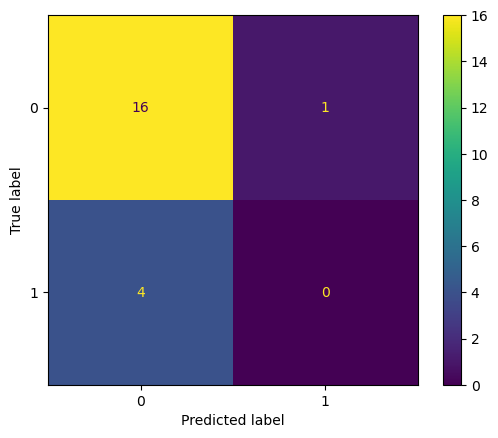

In [21]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm= confusion_matrix(y_te, y_pred)
disp= ConfusionMatrixDisplay(cm)
disp.plot()

In [22]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=4)
model_KNN.fit(x_tr,y_tr)
pred=model_KNN.predict(x_te)
accuracy_score(y_te,pred)

0.7619047619047619

In [23]:
knn_params=[{'n_neighbors':list(range(2,12))}]
model_knn_cv=GridSearchCV(model_KNN,knn_params,cv=10,scoring='accuracy')
model_knn_cv.fit(x_tr,y_tr)
accuracy_score(y_te,model_knn_cv.predict(x_te))

0.7619047619047619